In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import cv2 as cv
import matplotlib.pyplot as plt
import os
from uuid import uuid4
import pandas as pd
import numpy as np
import random
import tensorflow as tf
from tensorflow import keras
from keras import layers
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, f1_score
from sklearn.model_selection import train_test_split
from keras import models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.utils import shuffle

In [3]:
cap = cv.VideoCapture('/content/drive/MyDrive/new/Video_2025-06-13_060505.wmv')
count = 0
while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        print("End of video stream or error reading frame.")
        break

    img = frame[300:600,200:800]
    cv.imwrite(os.path.join('/content/images', f"{count}.jpg"), img)
    count += 1
    if count % 100 == 0:
        print(count)

100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000
3100
3200
3300
3400
3500
3600
End of video stream or error reading frame.


In [4]:
l_1 = [0 for i in range(61)]
l_2 = [1 for i in range(61, 200)]
l_3 = [0 for i in range(200, 293)]
l_4 = [1 for i in range(293, 1191)]
l_5 = [0 for i in range(1191, 1222)]
l_6 = [1 for i in range(1222, 1691)]
l_7 = [0 for i in range(1691, 1789)]
l_8 = [1 for i in range(1789, 1886)]
l_9 = [0 for i in range(1886, 2013)]
l_10 = [1 for i in range(2013, 2088)]
l_11 = [0 for i in range(2088, 2217)]
l_12 = [1 for i in range(2217, 2922)]
l_13 = [0 for i in range(2922, 2947)]
l_14 = [1 for i in range(2947, 3141)]
l_15 = [0 for i in range(3141, 3594)]
array_1 = np.array(l_1)
array_2 = np.array(l_2)
array_3 = np.array(l_3)
array_4 = np.array(l_4)
array_5 = np.array(l_5)
array_6 = np.array(l_6)
array_7 = np.array(l_7)
array_8 = np.array(l_8)
array_9 = np.array(l_9)
array_10 = np.array(l_10)
array_11 = np.array(l_11)
array_12 = np.array(l_12)
array_13 = np.array(l_13)
array_14 = np.array(l_14)
array_15 = np.array(l_15)

In [5]:
fainal_array = np.concatenate((array_1, array_2, array_3, array_4, array_5, array_6, array_7, array_8,
                               array_9, array_10, array_11, array_12, array_13, array_14, array_15))
fainal_array.shape

(3594,)

In [6]:
df = pd.DataFrame(fainal_array)
df.value_counts()

,count
0,
1,2577
0,1017


In [7]:
images = np.zeros((3594, 128, 128))
for i in range(fainal_array.shape[0]):
    img = cv.imread(os.path.join('/content/images', f"{i}.jpg"), cv.IMREAD_GRAYSCALE)
    img = cv.resize(img, (128, 128)) / 255
    images[i] = img
    if i % 100 == 0:
        print(i)

0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000
3100
3200
3300
3400
3500


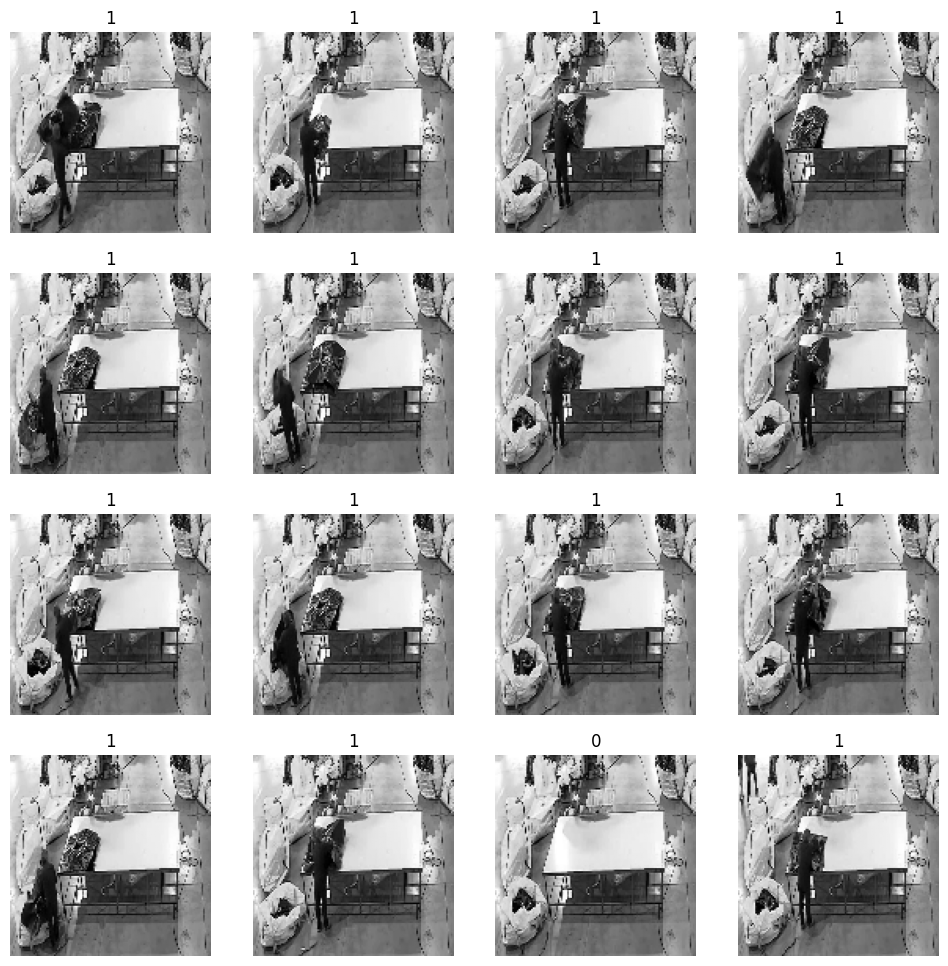

In [8]:
fig, ax = plt.subplots(4, 4, figsize=(12, 12))
for i in range(4):
    for j in range(4):
        number = random.randint(0, 1222)
        img = images[number]
        label = fainal_array[number]
        ax[i, j].imshow(img, cmap='gray')
        ax[i, j].set_title(label)
        ax[i, j].axis('off')

In [9]:
x_train, x_test, y_train, y_test = train_test_split(images, df, test_size=(0.5))

In [18]:
input_shape = (128, 128, 1)
input_img = tf.keras.Input(shape=input_shape)

x = layers.Conv2D(16, 3, activation='relu', padding='same')(input_img)
x = layers.MaxPooling2D((2, 2), padding='same')(x)
x = layers.Conv2D(32, 3, activation='relu', padding='same')(x)
x = layers.MaxPooling2D((2, 2))(x)
x = layers.Conv2D(32, 3, activation='relu', padding='same')(x)
x = layers.MaxPool2D((4, 4))(x)
x = layers.Flatten()(x)
x = layers.Dense(64, activation='relu')(x)
x = layers.Dense(1, activation='sigmoid')(x)
encoder = keras.Model(input_img, x)

encoder.summary()

Model: "functional_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_4 (InputLayer)      │ (None, 128, 128, 1)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_12 (Conv2D)              │ (None, 128, 128, 16)   │           160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 64, 64, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_13 (Conv2D)              │ (None, 64, 64, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (None, 32, 32, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_14 (Conv2D)              │ (None, 32, 32, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_12 (MaxPooling2D) │ (None, 8, 8, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 64)             │       131,136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 145,249 (567.38 KB)

 Trainable params: 145,249 (567.38 KB)

 Non-trainable params: 0 (0.00 B)

In [19]:
encoder.compile(loss=keras.losses.binary_crossentropy,
                optimizer=keras.optimizers.Adam(),
                metrics=['accuracy'])

In [20]:
hist_2 = encoder.fit(x_train, y_train, epochs=10, validation_split=(0.1))

Epoch 1/10
51/51 ━━━━━━━━━━━━━━━━━━━━ 5s 59ms/step - accuracy: 0.7034 - loss: 0.5718 - val_accuracy: 0.9056 - val_loss: 0.2872
Epoch 2/10
51/51 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.9180 - loss: 0.1926 - val_accuracy: 0.9889 - val_loss: 0.0550
Epoch 3/10
51/51 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.9691 - loss: 0.1017 - val_accuracy: 0.9889 - val_loss: 0.0517
Epoch 4/10
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9789 - loss: 0.0651 - val_accuracy: 0.9833 - val_loss: 0.0427
Epoch 5/10
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9800 - loss: 0.0484 - val_accuracy: 0.9833 - val_loss: 0.0331
Epoch 6/10
51/51 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.9869 - loss: 0.0489 - val_accuracy: 0.9944 - val_loss: 0.0288
Epoch 7/10
51/51 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.9865 - loss: 0.0372 - val_accuracy: 0.9889 - val_loss: 0.0244
Epoch 8/10
51/51 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.9903 - loss: 0.0286 - val_accuracy: 0.9833 - val_

In [21]:
encoder.evaluate(x_test, y_test)

57/57 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.9886 - loss: 0.0255


[0.025668395683169365, 0.9905397891998291]

In [22]:
prediction = encoder.predict(x_test)
prediction = (prediction >= 0.5).astype(int)
print(classification_report(prediction, y_test))

57/57 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step
              precision    recall  f1-score   support

           0       1.00      0.97      0.98       539
           1       0.99      1.00      0.99      1258

    accuracy                           0.99      1797
   macro avg       0.99      0.98      0.99      1797
weighted avg       0.99      0.99      0.99      1797

